In [2]:
# 데이터 불러오기
import seaborn as sns
iris = sns.load_dataset('iris')  

X = iris.drop('species', axis=1) 
y = iris['species']

In [3]:
# y data를 범주형으로 변환
from sklearn.preprocessing import LabelEncoder   
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values)

In [4]:
# 전체 data를 training set과 test set으로 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)

In [5]:
# 표준화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
# Decision Tree 적합
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 1)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_train, y_train_pred))

0.9523809523809523
0.9777777777777777
[[35  0  0]
 [ 0 34  1]
 [ 0  4 31]]


[Text(0.3333333333333333, 0.875, 'X[3] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.5, 0.625, 'X[2] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.6666666666666666, 0.375, 'X[3] <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(0.5, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]')]

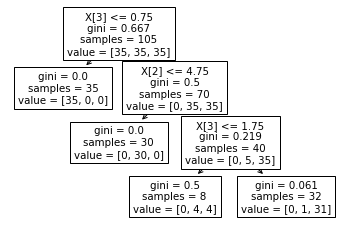

In [7]:
tree.plot_tree(dtc.fit(X_train, y_train))

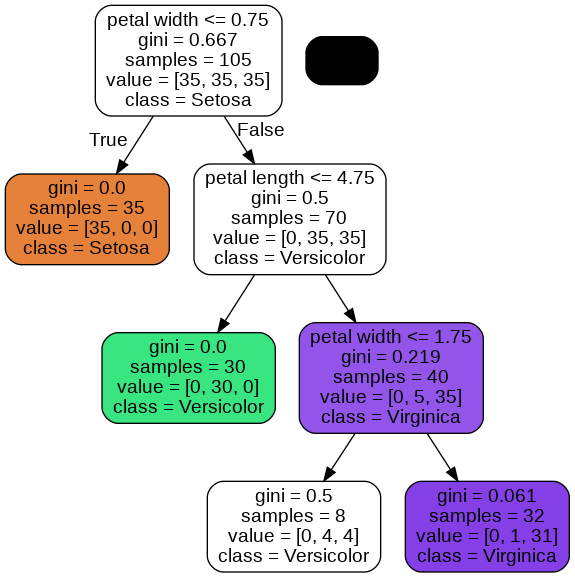

In [8]:
# Graph
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc, filled = True, rounded = True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'],
                           feature_names=['sepal length', 'sepal width',
                                          'petal length', 'petal width'],
                           out_file = None)
graph = graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph.create_png())